In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

# Part-1: Data Exploration and Pre-processing

In [4]:
#  load the given dataset.
df = pd.read_excel(r'C:\Users\Admin\Downloads\Python_Project_7_KNN.xlsx')
df

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


In [6]:
#  check the null values.
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [7]:
# Get basic information from data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [8]:
# Describe the dataset.
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

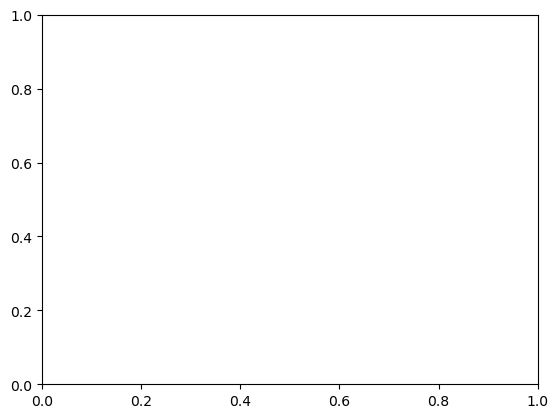

In [10]:
# Display scatterplot between age & Total work Experience.
x = plt.xlabel(df['Age'])
y = plt.ylabel(df['Total Work Experience'])
plt.scatter(x,y,color='red',marker='+')
plt.show()

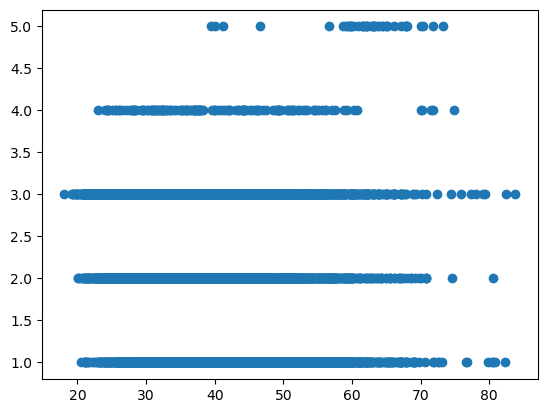

In [11]:
plt.scatter(df['Age'],df['Total Work Experience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x12c3169c100>,
 'caps': [<matplotlib.lines.Line2D at 0x12c3169c6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12c3180bdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x12c3169cc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c3169cf10>],
 'means': []}

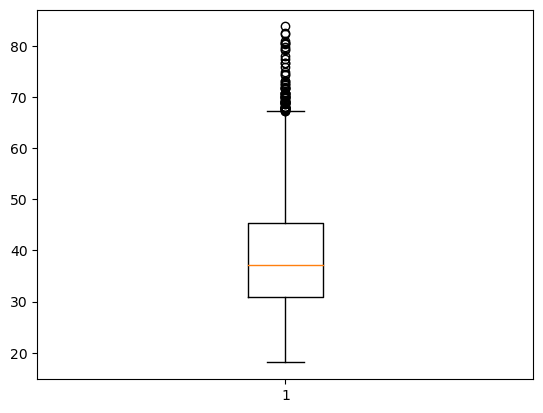

In [12]:
#  Display box plot for age.
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x12c316ff820>,
 'caps': [<matplotlib.lines.Line2D at 0x12c316ffdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12c316ff550>],
 'medians': [<matplotlib.lines.Line2D at 0x12c3170c3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c3170c6a0>],
 'means': []}

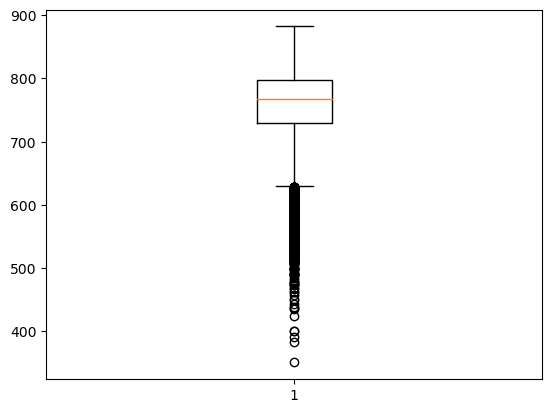

In [13]:
#  Display box plot for Cibil score.
plt.boxplot(df['Cibil score'])

In [18]:
#  Create target and features data where target is Total bounces past12months.
x = df.drop(['Total bounces past12months'], axis=1)
y = df['Total bounces past12months']
y

0       0
1       0
2       0
3       0
4       1
       ..
8990    0
8991    0
8992    0
8993    0
8994    0
Name: Total bounces past12months, Length: 8995, dtype: int64

# Part-2: Working with Model

In [20]:
# Split data into training and testing sets.
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [22]:
#  Create a KNN classifier between Features and target data.
from sklearn.neighbors import KNeighborsClassifier
regmodel = KNeighborsClassifier()
regmodel.fit(x,y)

KNeighborsClassifier()

In [23]:
#  Display the training score.
regmodel.score(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6809338521400778

In [24]:
#  Display the testing score.
regmodel.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.688160088938299

In [25]:
y_pred = regmodel.predict(X_test)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
# Find the Confusion matrix.
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score
confusion_matrix(y_test,y_pred)

array([[1170,   21,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 191,   45,    1,    2,    0,    0,    1,    0,    0,    0,    0,
           0,    0],
       [  87,    7,    8,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  51,    6,    1,    3,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  35,    6,    2,    1,    1,    0,    0,    0,    2,    0,    0,
           0,    0],
       [  29,    4,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  12,    3,    0,    1,    0,    0,    1,    0,    0,    0,    0,
           0,    0],
       [  13,    3,    0,    0,    0,    1,    0,    2,    2,    0,    0,
           0,    1],
       [  15,    1,    0,    0,    0,    1,    0,    1,    3,    1,    0,
           0,    0],
       [  11,    3,    1,    0,    0,    1,    0,    0,    1,    2,    0,
           0,    1],
       [  15,    0,    0,    0,    1,    1,    0, 

In [27]:
# Print the accuracy score.
accuracy_score(y_test, y_pred)

0.688160088938299

In [32]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(X_train,y_train)
    
    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_test,y_test))
    
print("test_scores", test_scores)
print("train_scores", train_scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

test_scores [0.5497498610339078, 0.6236798221234019, 0.6236798221234019, 0.6397998888271261, 0.6381322957198443, 0.6442468037798778, 0.6503613118399111, 0.6492495831017232, 0.6542523624235687, 0.6581434130072262, 0.6581434130072262, 0.6592551417454141, 0.6609227348526959, 0.6586992773763202]
train_scores [1.0, 0.7440244580322402, 0.7066425792106726, 0.6894107837687604, 0.6802390216787104, 0.669538632573652, 0.6648137854363535, 0.6623123957754308, 0.6584213451917732, 0.6586992773763202, 0.6573096164535853, 0.656058921623124, 0.656058921623124, 0.6534185658699277]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


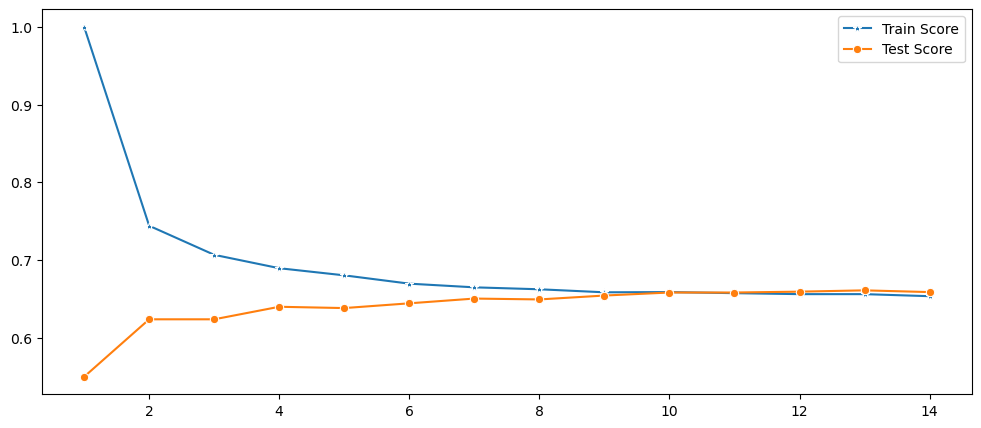

In [29]:
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')